# i. Perkenalan

**Nama**: Muhammad Iqbal Saputra

**Batch**: RMT-032

**Objective**: Kode dibawah bertujuan untuk membuat model yang bertujuan untuk memprediksi apakah customer akan membatalkan pemesanan kamar hotel atau tidak. (Binary Classification)

# ii. Import Libraries

In [1]:
%pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Basic libraries
import numpy as np
import pandas as pd
from time import strftime
import itertools
import random
import os
from os import walk
from os.path import join

#Visualization and image processing libraries
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

#ML libraries
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform, randint
# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
# Library Model Saving
import pickle
import joblib
import json

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
warnings.filterwarnings('ignore')

# iii. Data Loading

In [4]:
# Read Dataset
hotel_data_path = 'hotel.csv'
hotel_df = pd.read_csv(hotel_data_path)

In [5]:
# Show Dataset
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,ID00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,ID00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,ID00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,ID00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,ID00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# Show Dataset
hotel_df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,ID36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,ID36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,ID36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,ID36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,ID36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [7]:
# Make a copy of dataset, so raw dataset won't be changed
data = hotel_df.copy()

In [8]:
# Show info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are `36275 entries` data, consisting of `5 cat_column` and `11 num_columns`

# iv. EDA

In [9]:
# Stats Descriptive
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


Even tho the `repeated_guest` and `required_car_parking_space` is numerical column but they aren't considered as num features

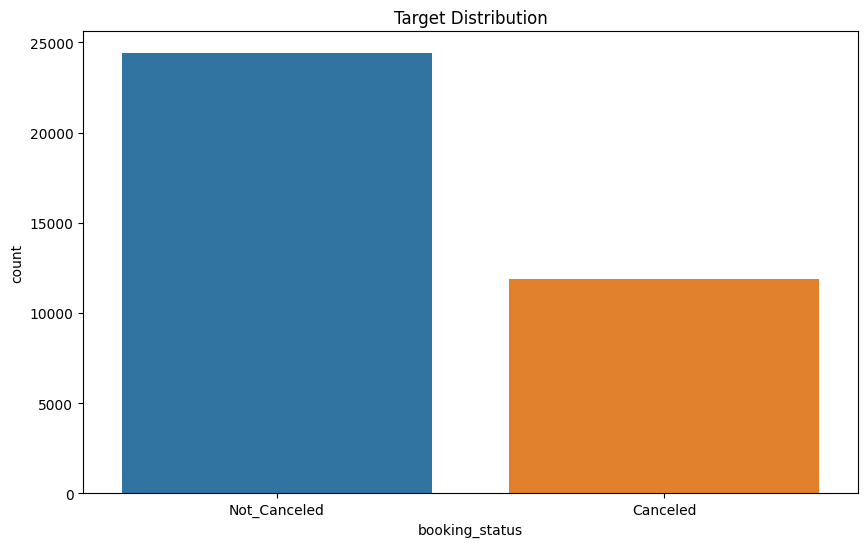

In [10]:
# Target Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='booking_status')
plt.title('Target Distribution')
plt.show()

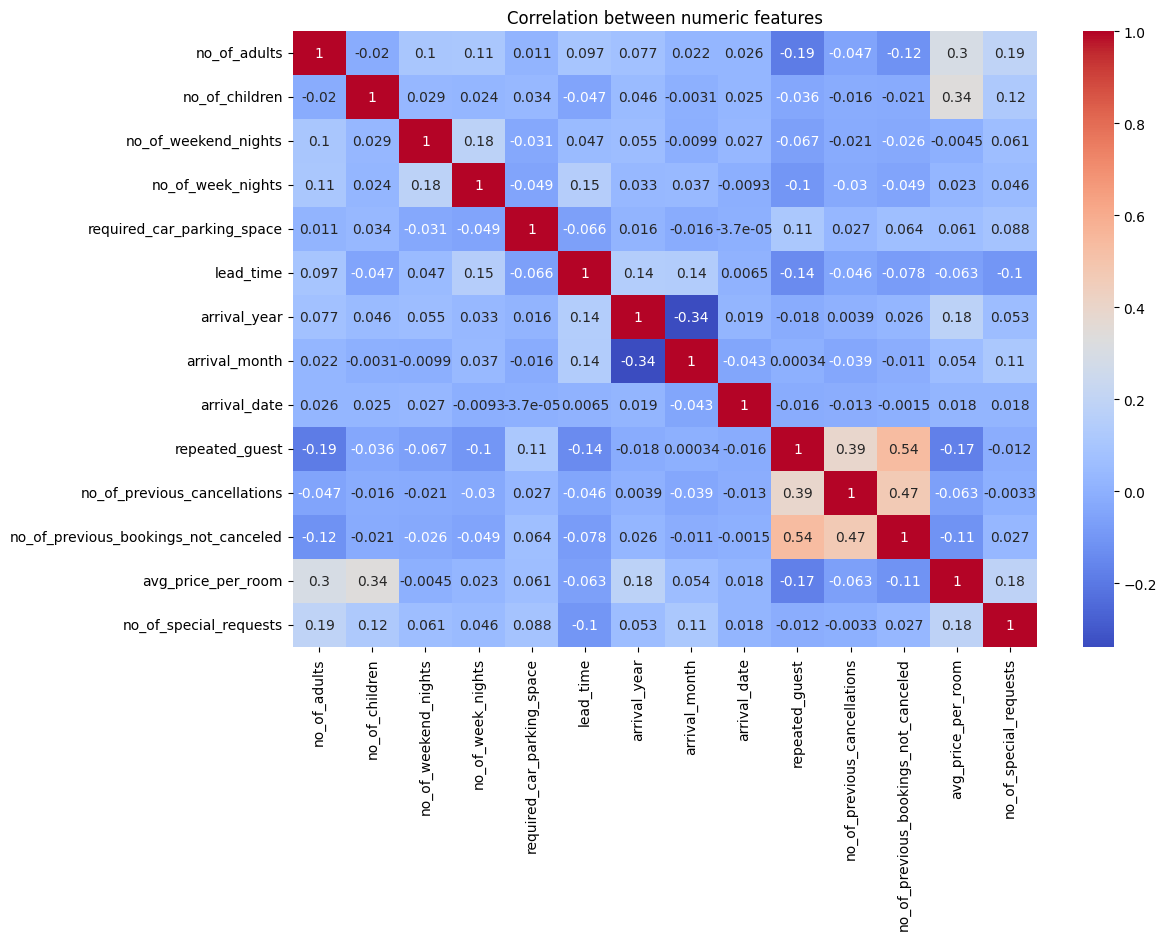

In [11]:
# Correlation
import numpy as np

numeric_df = data.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between numeric features')
plt.show()

Column `repeated_guest`, `no_of_previous_cancellations`, `no_of_previous_bookings_not_canceled` have the most significant corellation

# v. Feature Engineering

### i. - Data Splitting

In [12]:
# Data splitting
from sklearn.model_selection import train_test_split

# Split between features and target
X = data.drop('booking_status', axis=1)
y = data['booking_status']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size: ', X_train.shape)
print('Val Size: ', X_val.shape)
print('Test Size: ', X_test.shape)

Train Size:  (26208, 18)
Val Size:  (4625, 18)
Test Size:  (5442, 18)


### ii. - Handling Missing Values

In [13]:
# Check missing values
X_train.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [14]:
# Check missing values
X_val.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [15]:
# Check missing values
X_test.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [16]:
# Check missing values
y_test.isnull().sum()

0

Since there is no missing values, so we don't have to handling missing values

### iii. - Handling Outliers

In [17]:
# Defining cat&num columns
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 
                      'repeated_guest','required_car_parking_space']
num_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
                      'arrival_year', 'arrival_month', 'arrival_date',  'no_of_previous_cancellations',
                      'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'required_car_parking_space']
Numcerical Columns:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


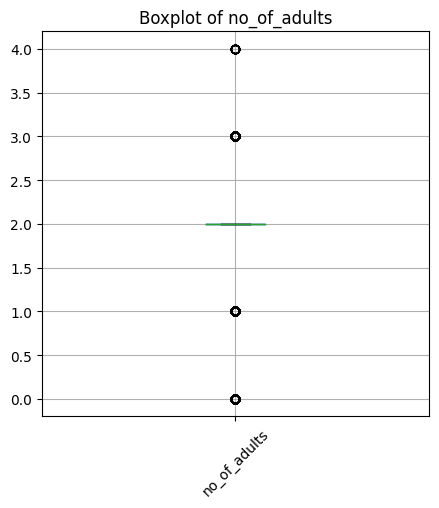

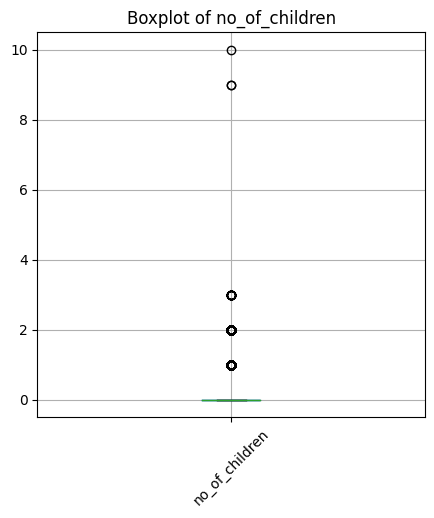

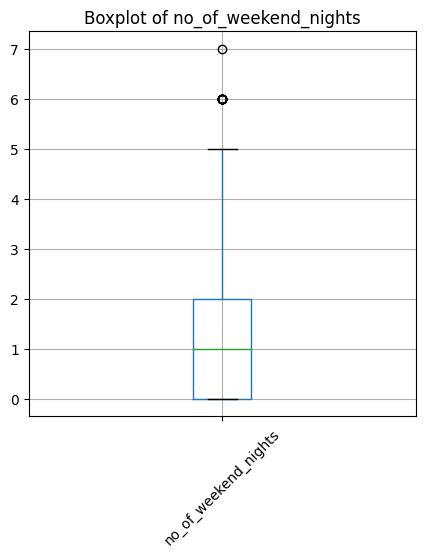

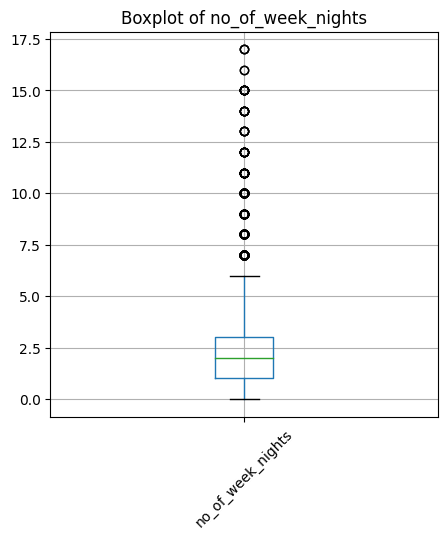

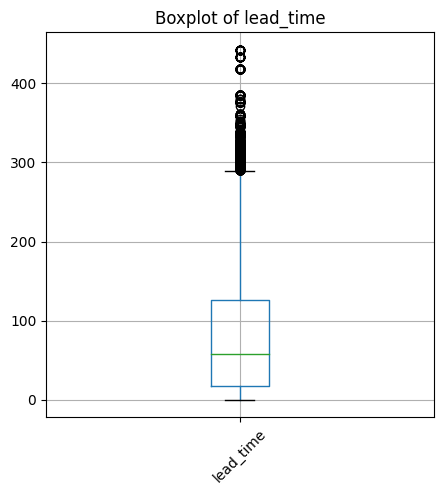

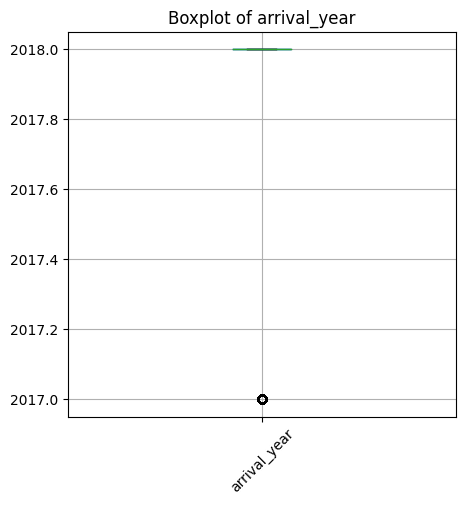

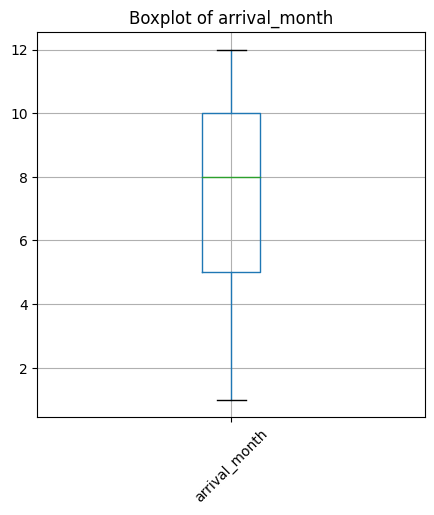

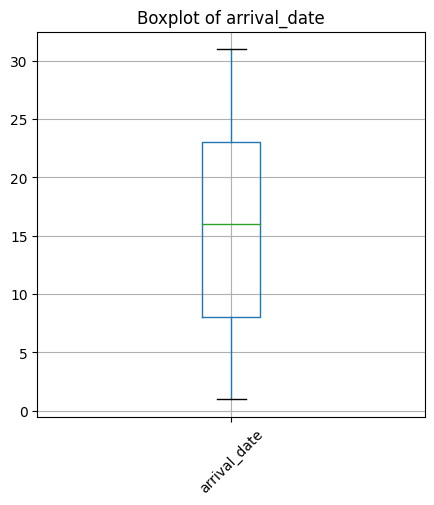

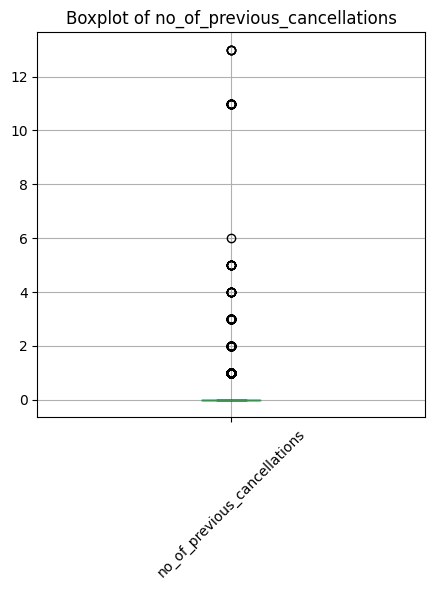

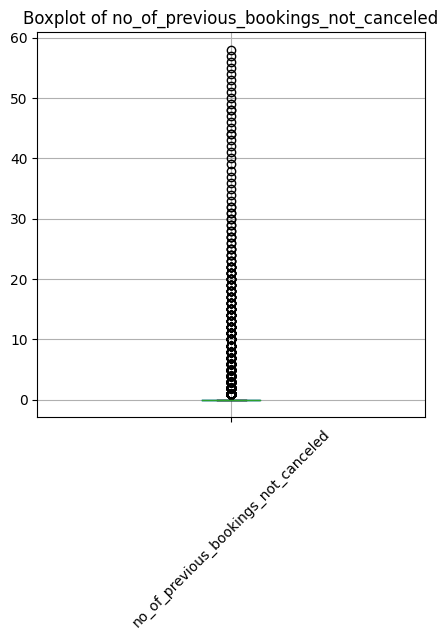

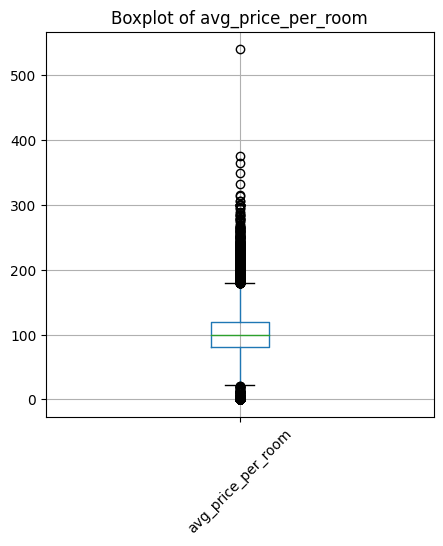

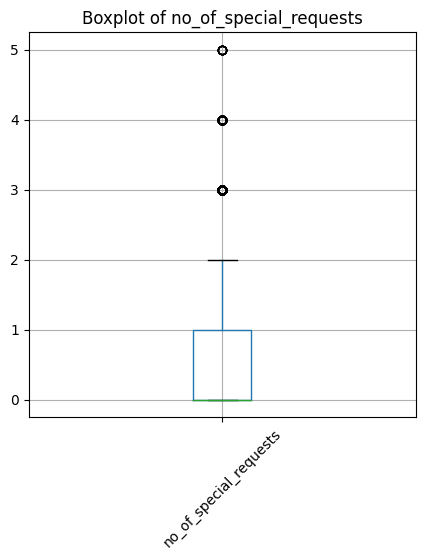

In [18]:
def show_boxplots(data, num_columns):
    for column in num_columns:
        plt.figure(figsize=(5,5))
        data.boxplot(column=column)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot of {column}')
        plt.show()

show_boxplots(data,num_columns)

Significant outliers found in certain columns like `no_of_adults`,`no_of_children`,`no_of_week_nights`,`lead_time`,`no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled`

In [19]:
# Define list for normal distribution columns
data_normal = []
column_normal = []

# Define list for skewed distribution columns
data_skewed = []
columns_skewed = []

# Loop in every num column
for num in num_columns:
    skewness = X_train[num].skew()
    
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    elif skewness < -0.5 and skewness > -1:
        columns_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])
        
    elif skewness > 0.5 and skewness < 1:
        columns_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])
        
    elif skewness < -1 or skewness > 1:
        columns_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])


In [20]:
# Show normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,no_of_adults,-0.343966
1,arrival_month,-0.344031
2,arrival_date,0.027392


In [21]:
# Show skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,no_of_children,4.947919,high
1,no_of_weekend_nights,0.730706,low
2,no_of_week_nights,1.551878,high
3,lead_time,1.289112,high
4,arrival_year,-1.665760,high
5,no_of_previous_cancellations,24.176895,high
6,no_of_previous_bookings_not_canceled,19.355836,high
7,avg_price_per_room,0.673949,low
8,no_of_special_requests,1.142555,high


In [22]:
# List low var column
low_variation_column = ['no_of_children', 'arrival_year', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']
# Drop column with low var in skewed column
for i in low_variation_column:
    columns_skewed.remove(i)
    column_normal.append(i)


In [23]:
from feature_engine.outliers import Winsorizer

# Capping method for Normal Distribution
winsorizer_normal = Winsorizer(capping_method='gaussian',
                               tail='both',
                               fold=3,
                               variables=column_normal,
                               missing_values='ignore')

# Fit & transform X_train
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

In [24]:
# Capping method for skewed distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                               tail='both',
                               fold=1.5,
                               variables=columns_skewed)

# Fit & transform X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [25]:
# Plot distribution comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    
    fig, axes = plt.subplots(2, 2, figsize=(15,10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')
    
    # Plot before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    
    # Plot before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')
    
    # Plot after
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')
    
    # Plot after
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

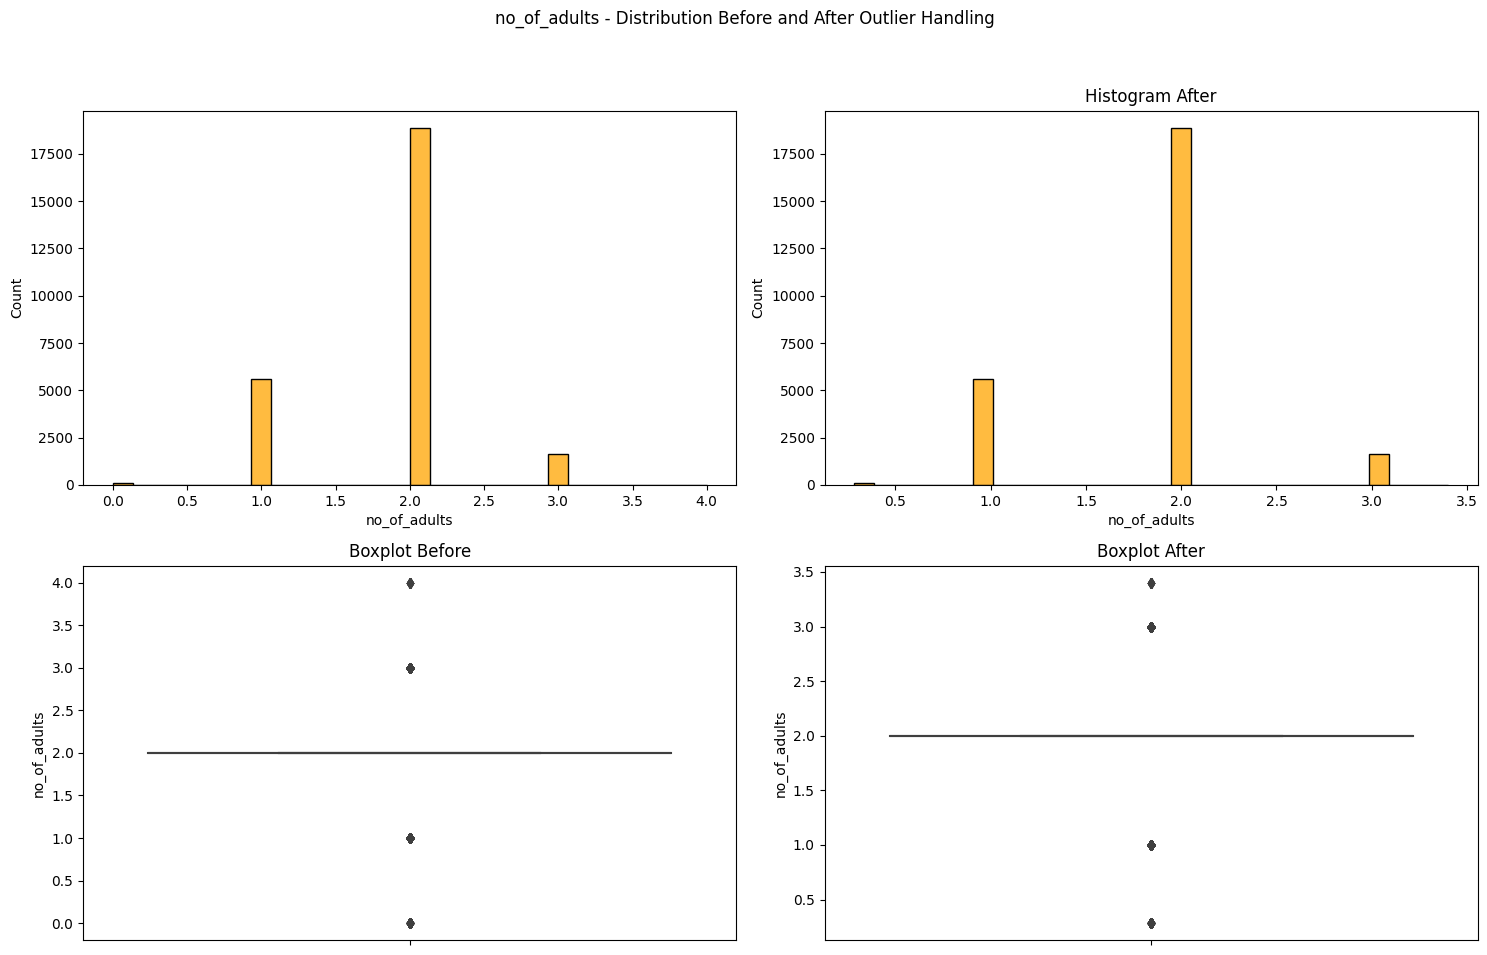

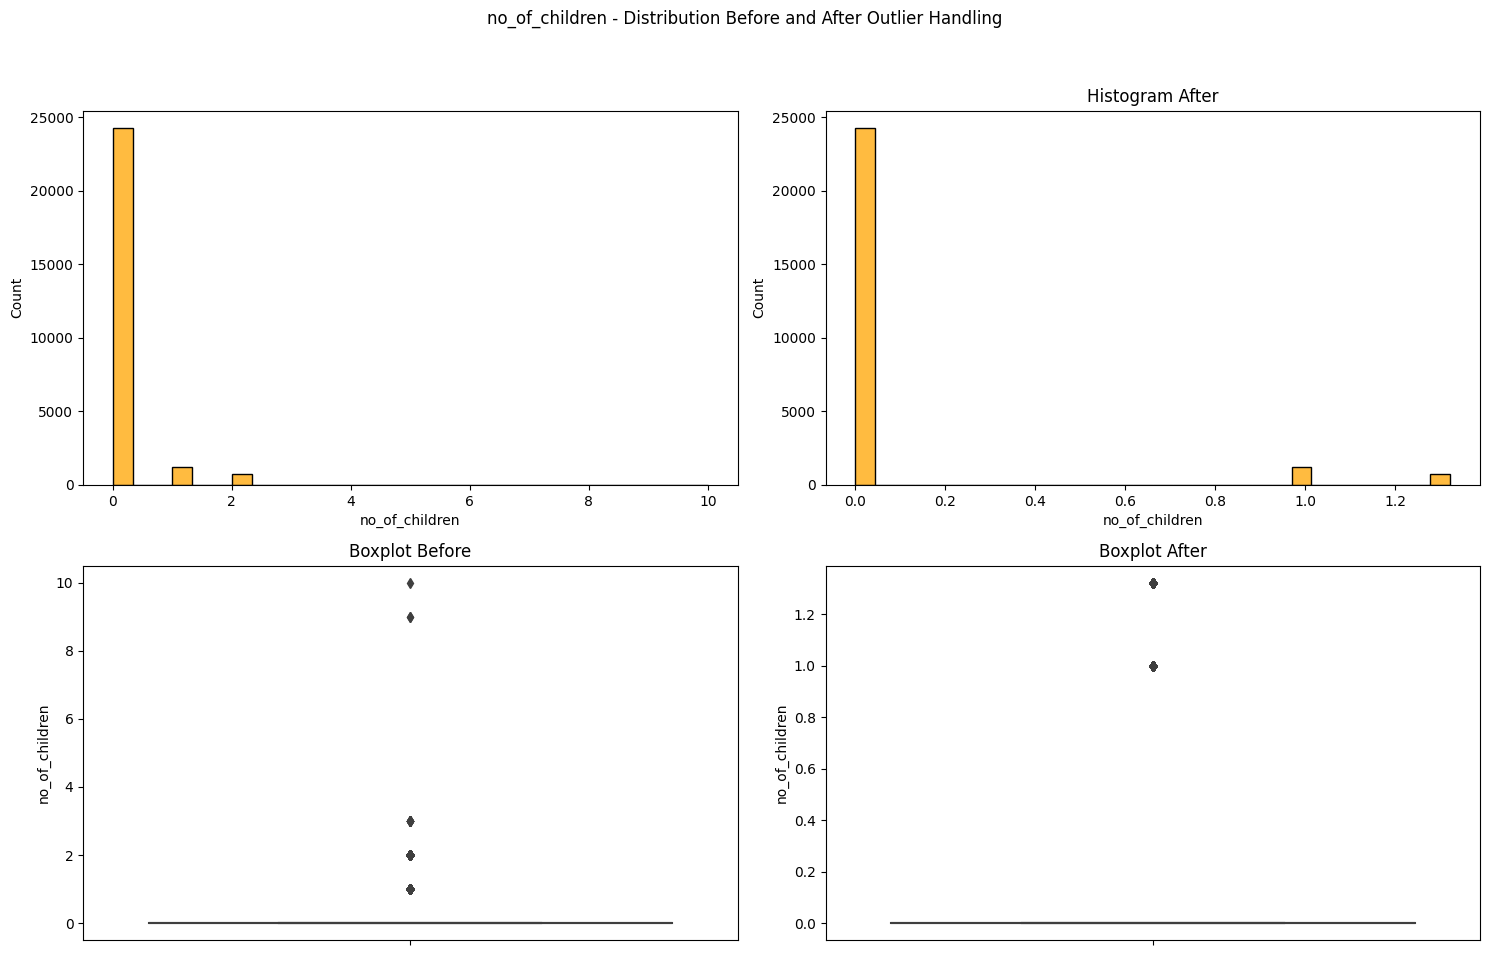

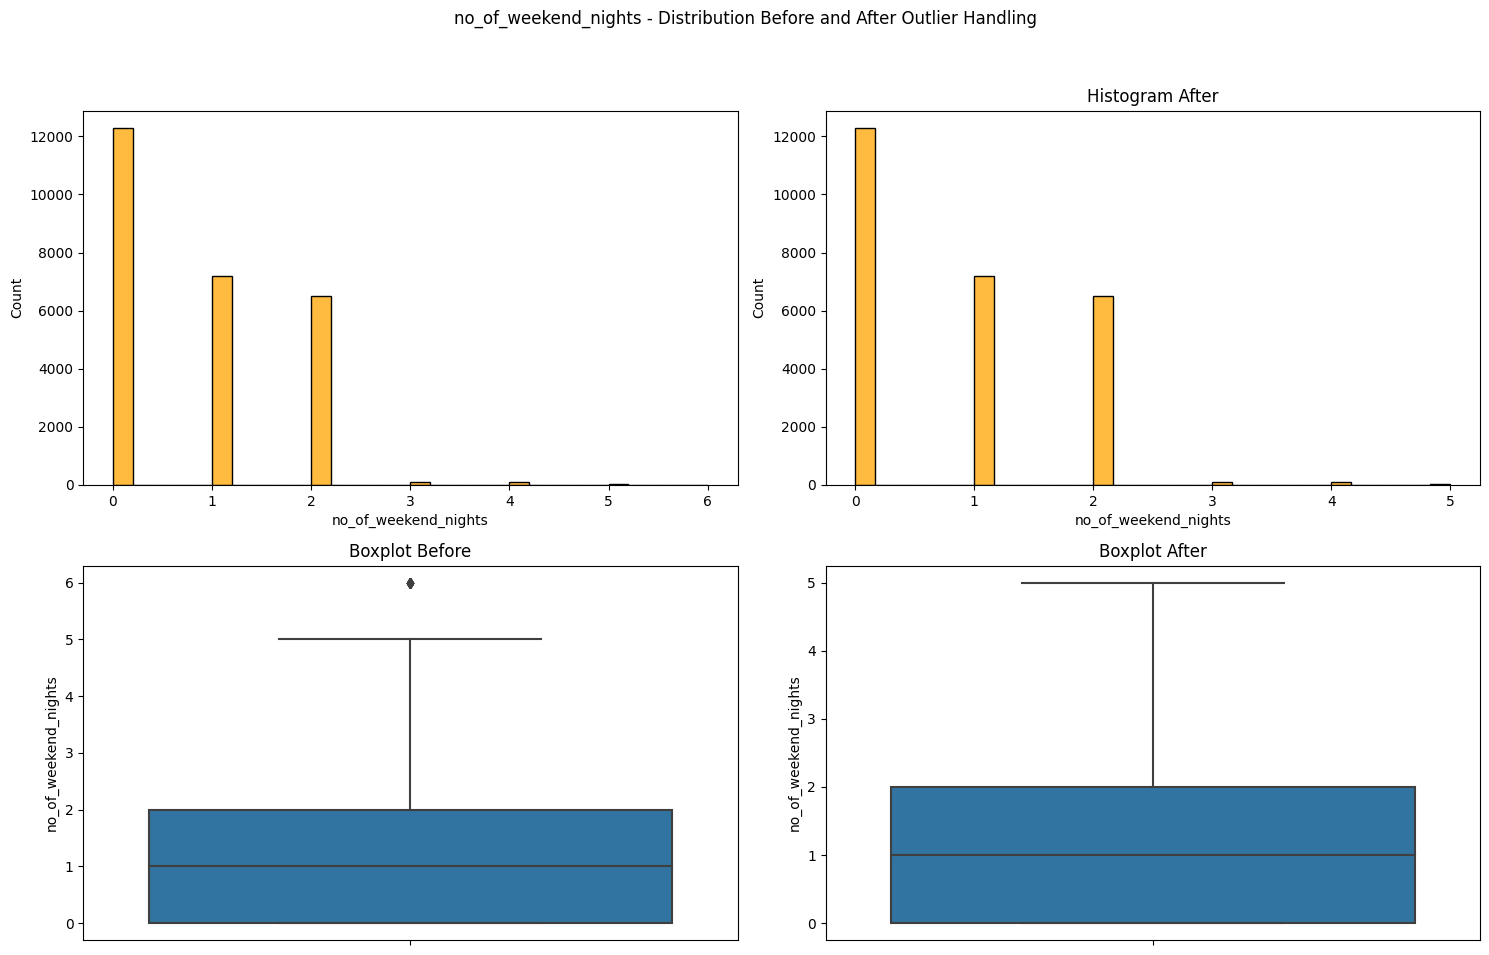

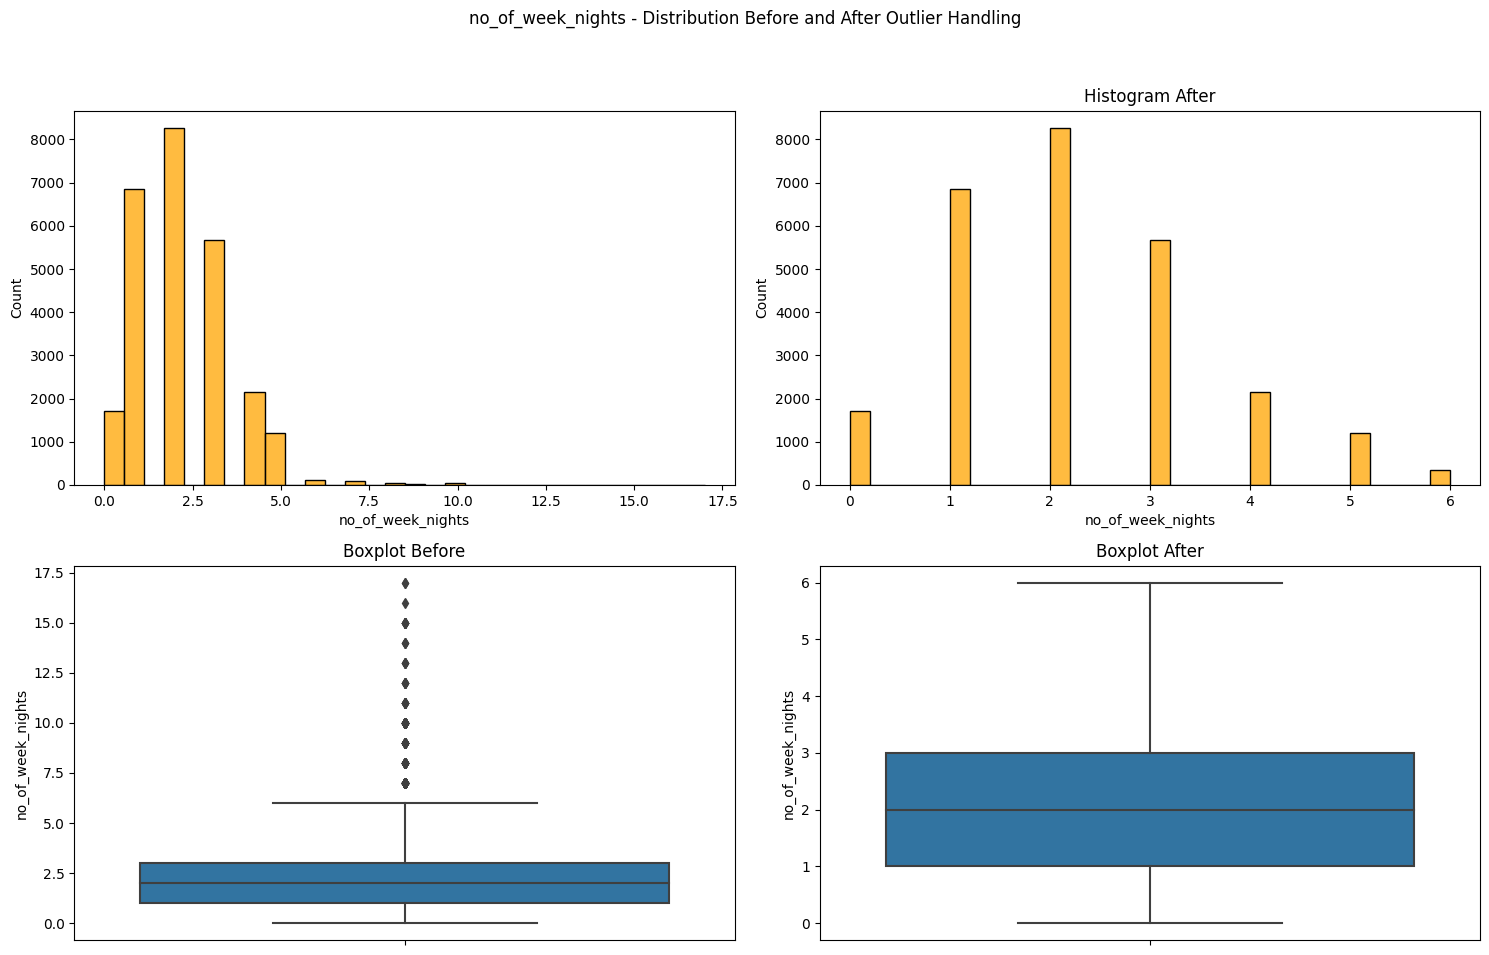

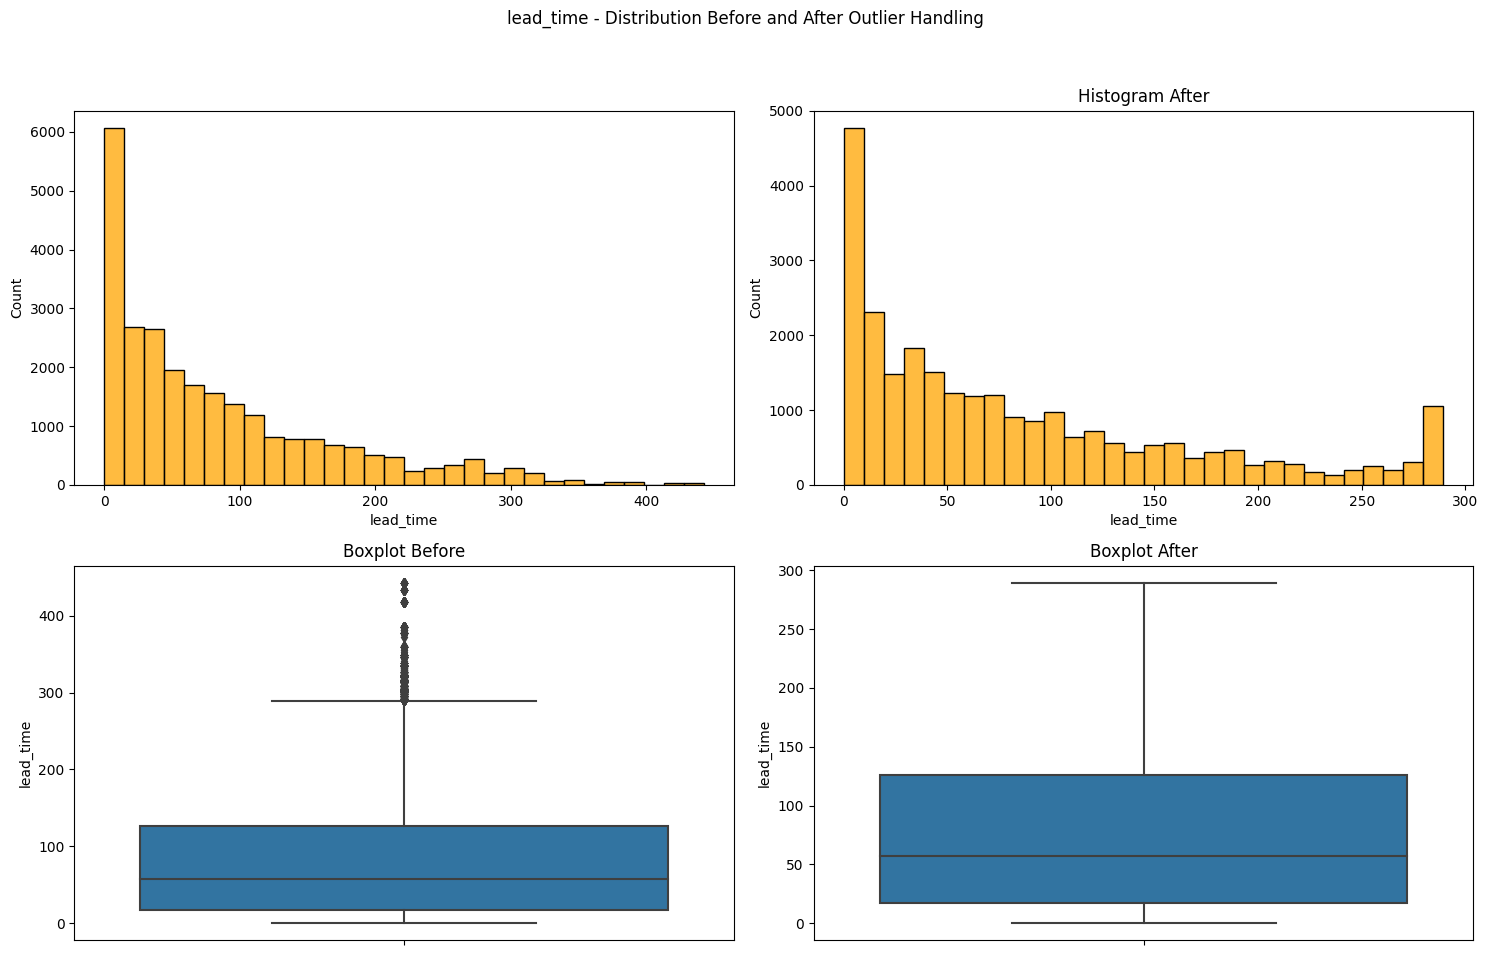

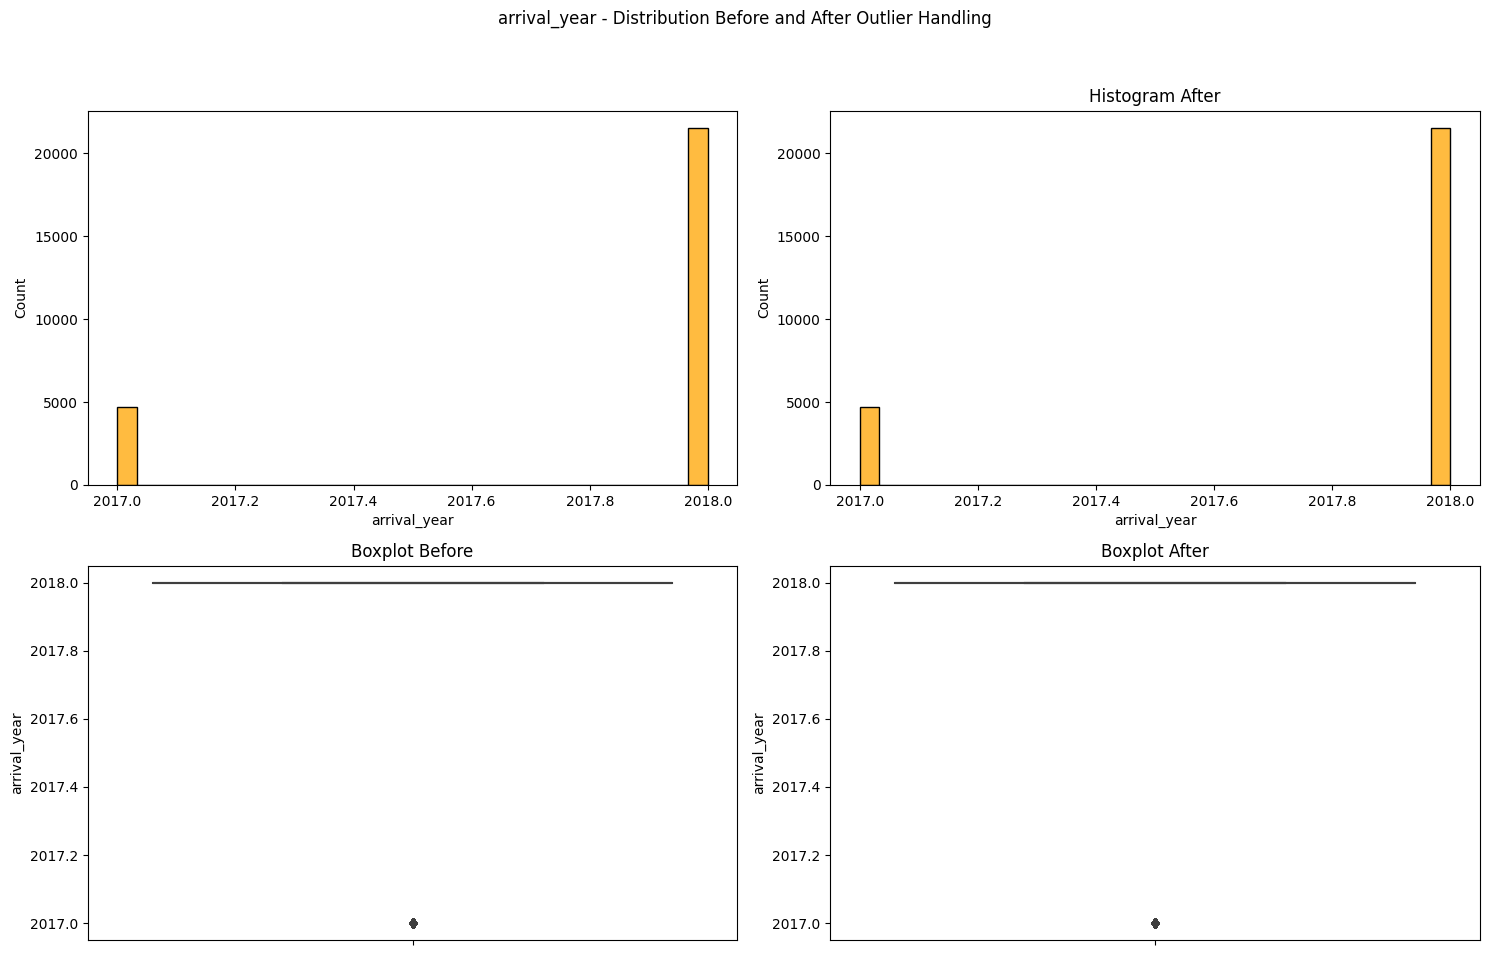

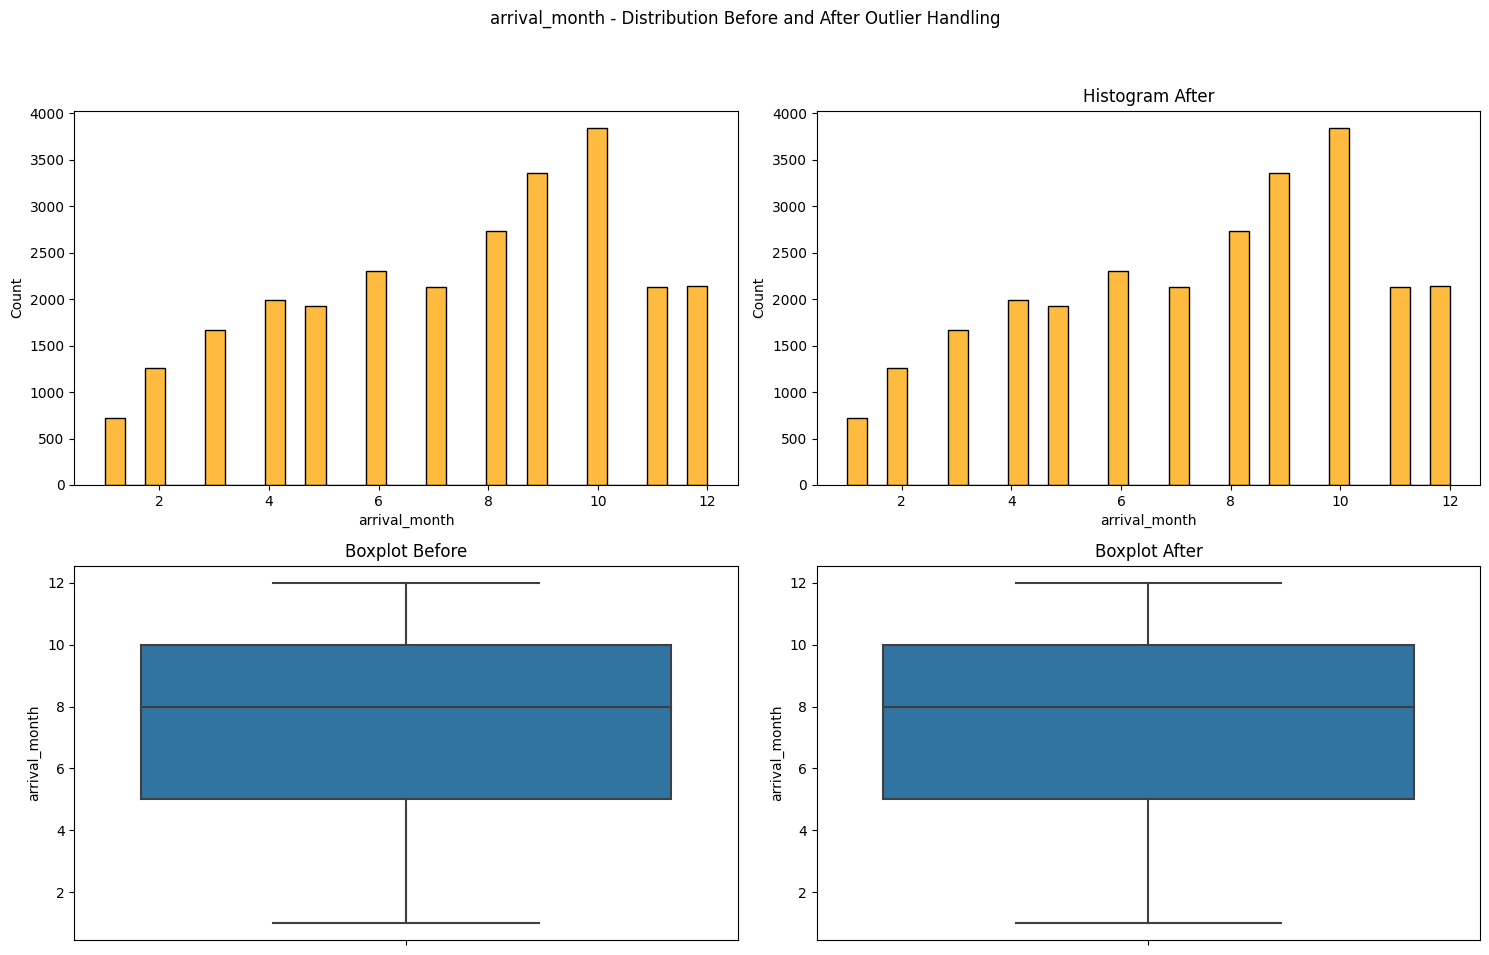

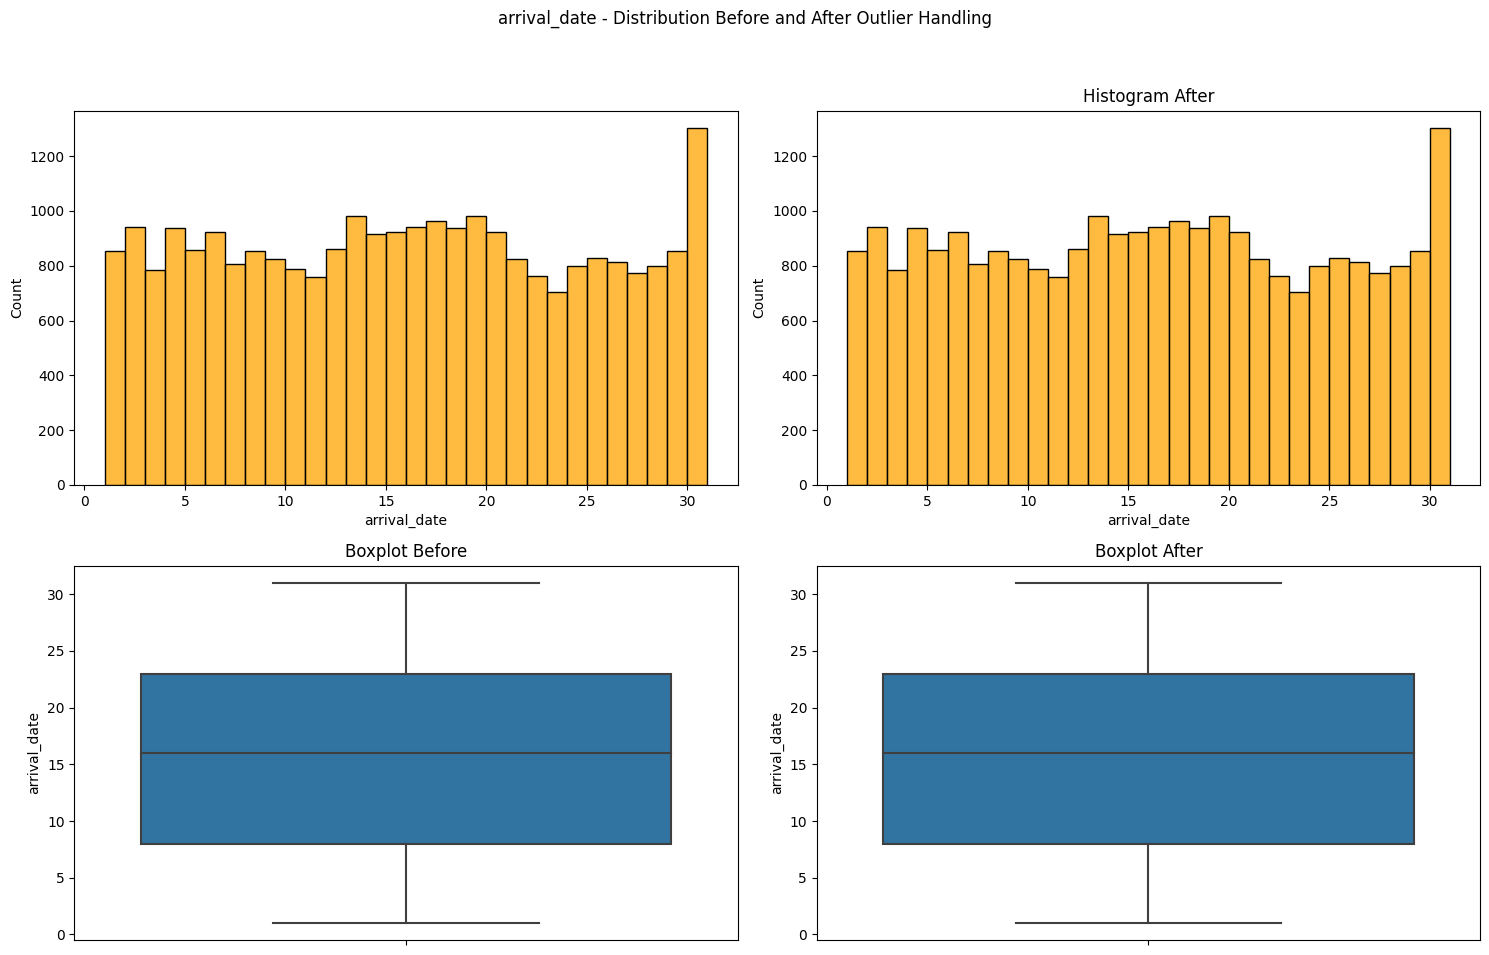

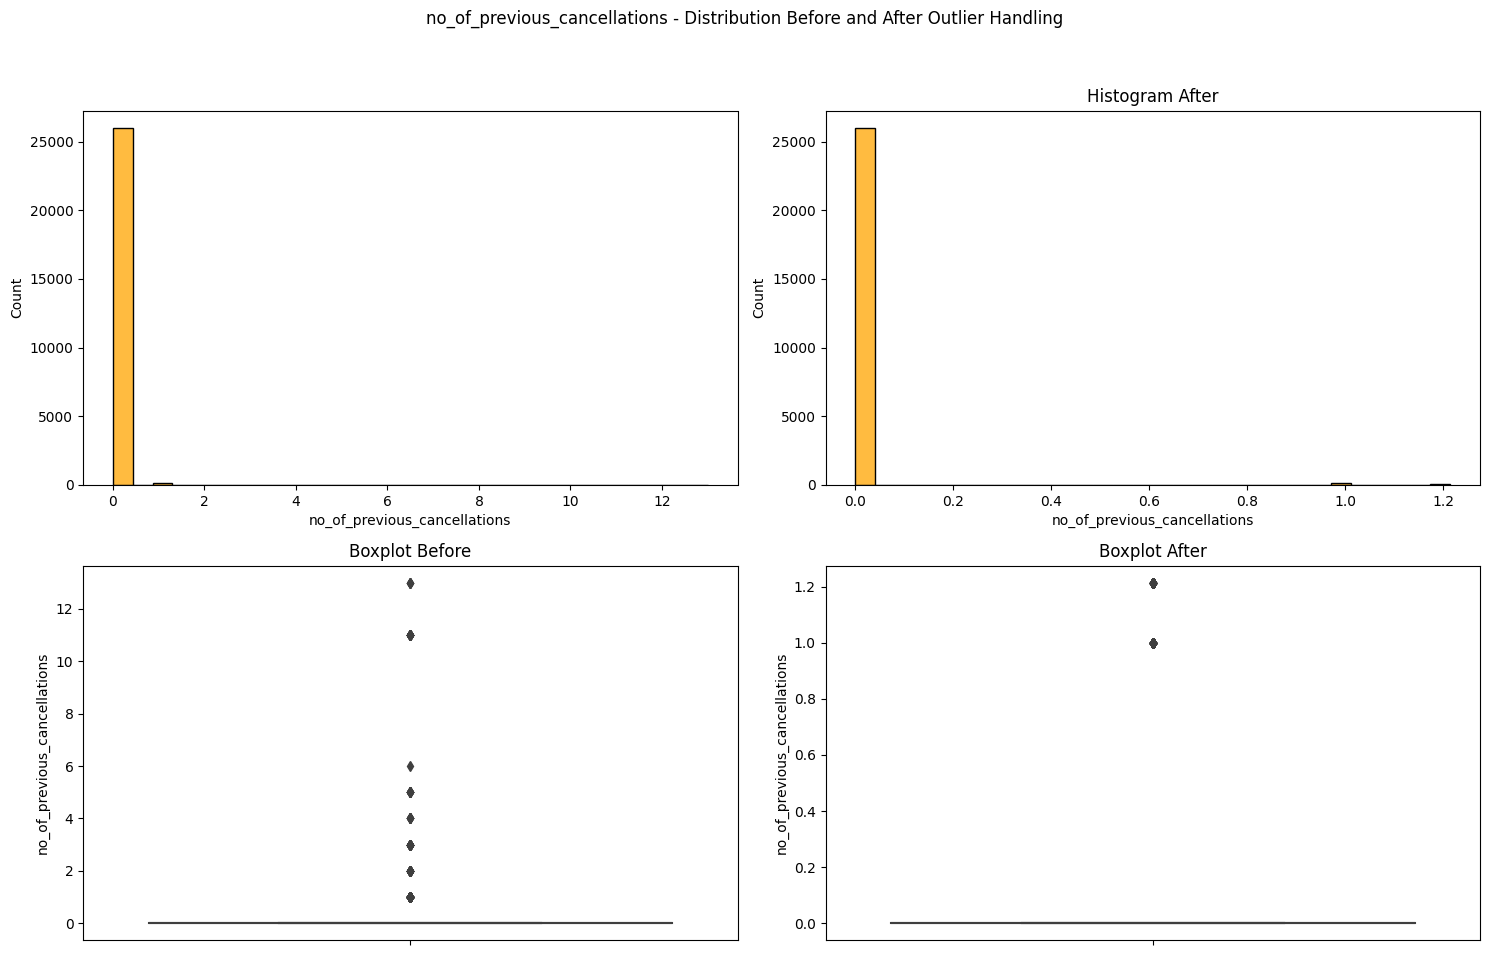

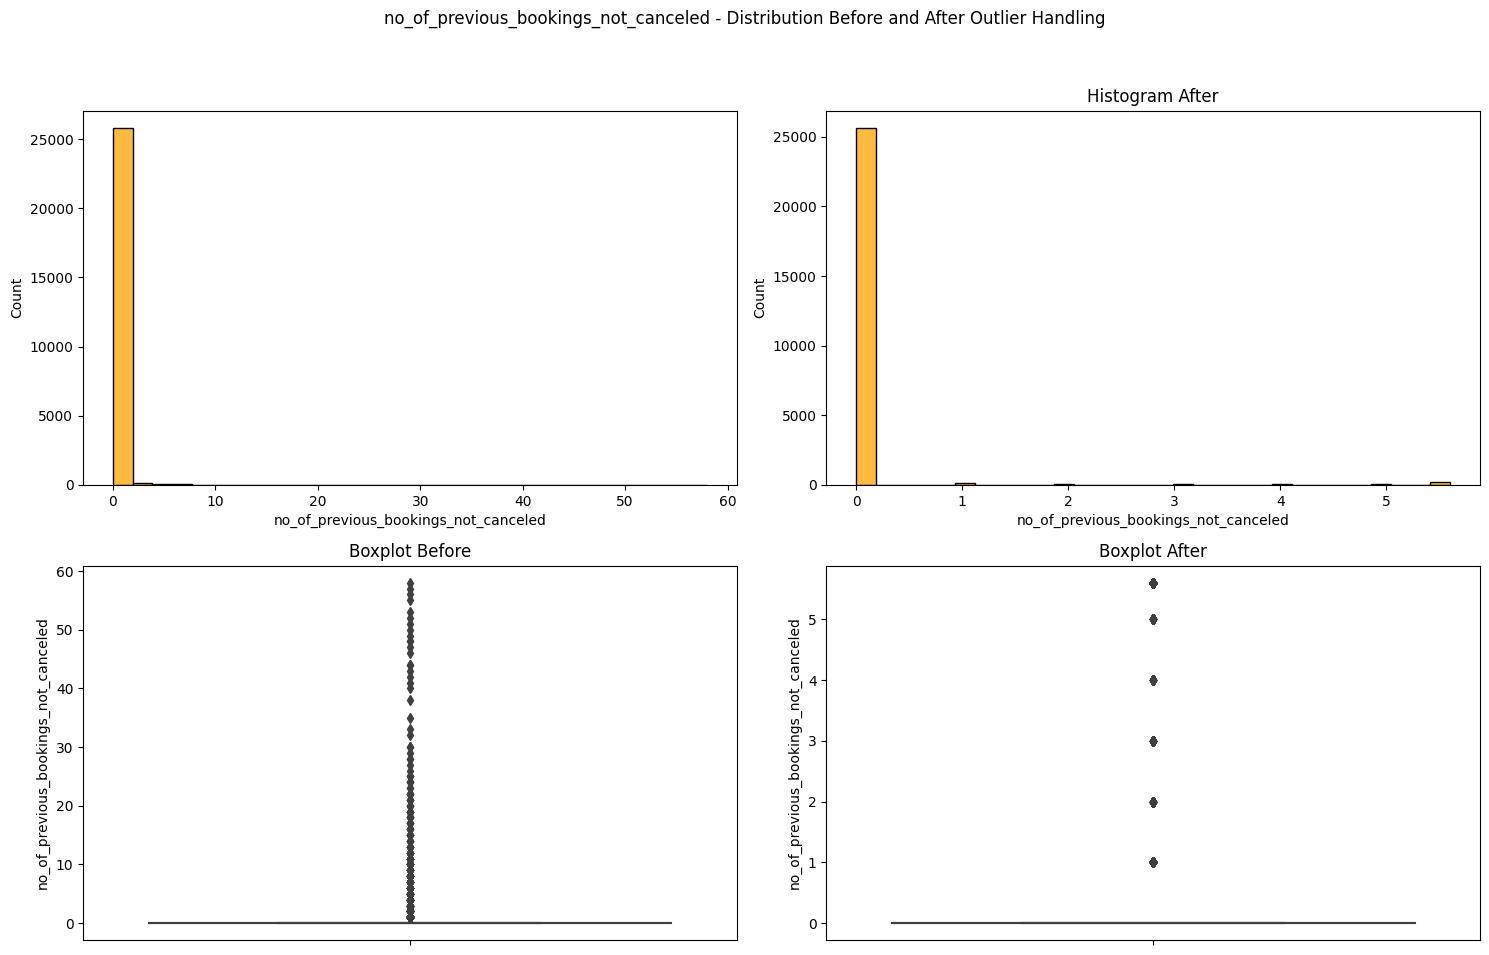

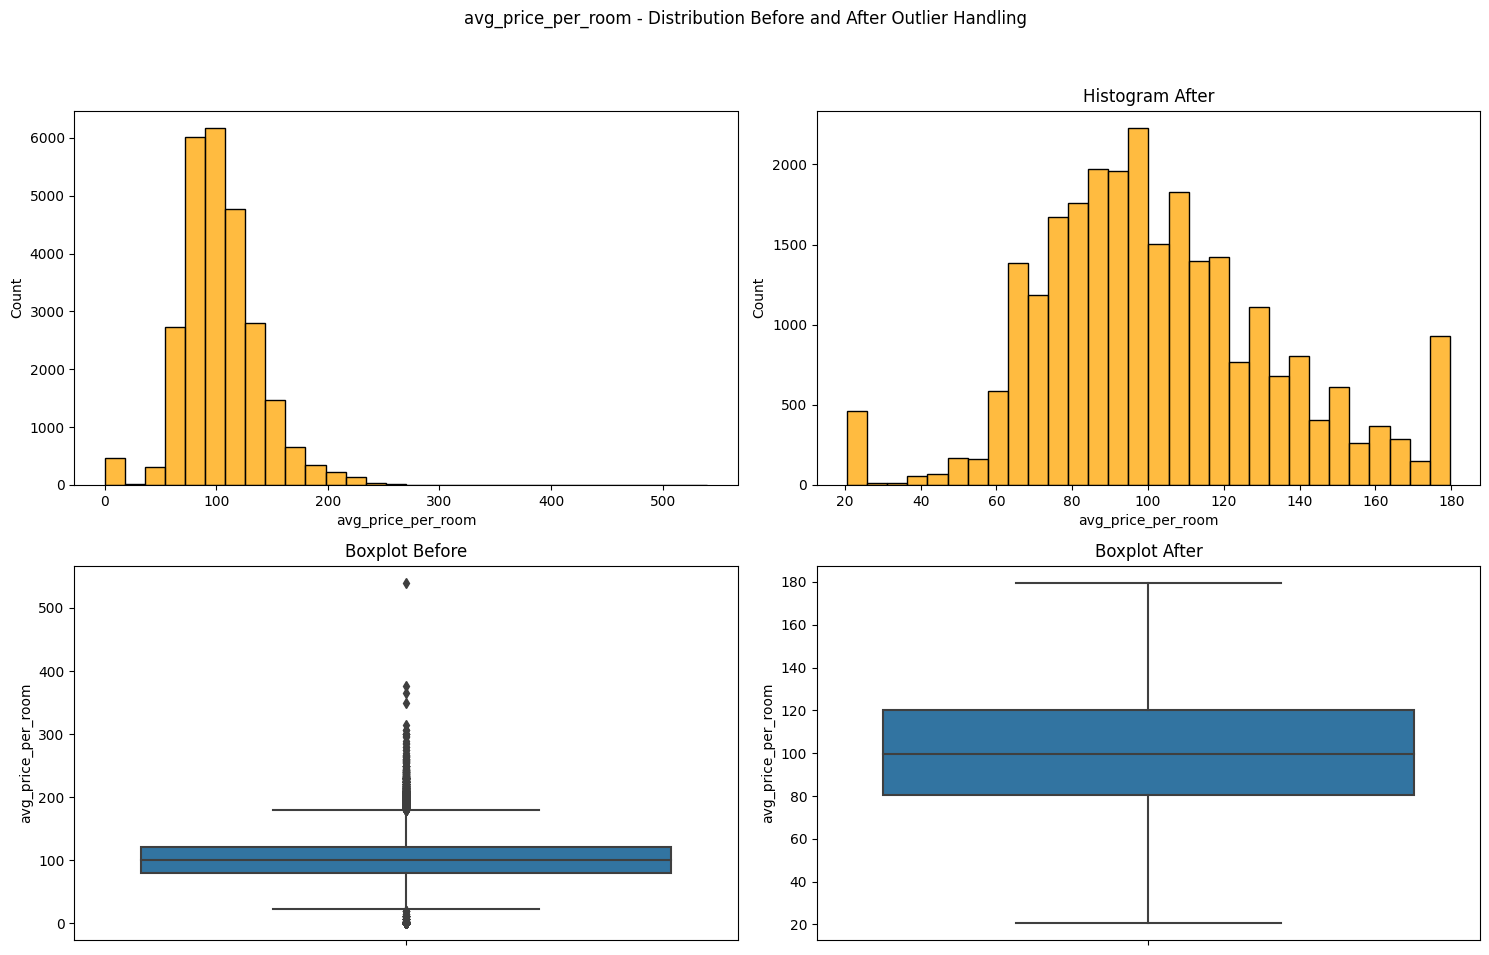

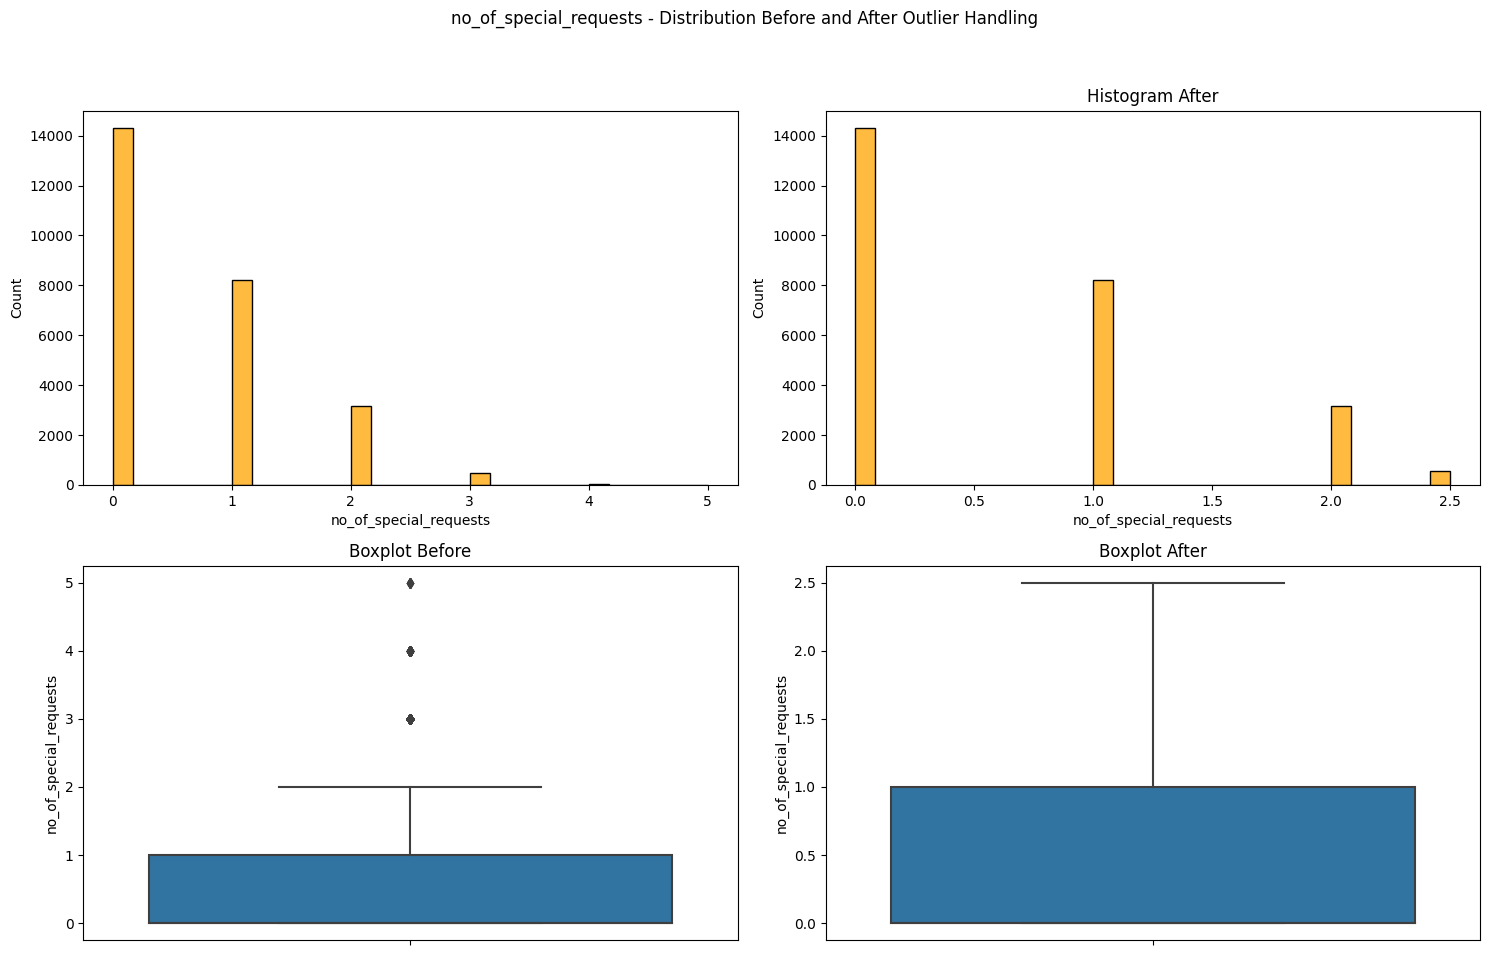

In [26]:
# Showing comparison
df_before = X_train
df_after = X_train_capped

for col in num_columns:
    outlier_handling_plot_comparison(df_before, df_after, col)

Outliers in num_columns already handled

### iv. - Feature Selection

In [27]:
# Defining column
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

# Show data
X_train_num.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
34325,2.0,0.0,2,0,0.0,2017,8,9,0.0,0.0,96.00,0.0
33707,1.0,0.0,2,4,245.0,2018,7,6,0.0,0.0,110.00,0.0
17213,1.0,0.0,0,3,289.5,2018,10,13,0.0,0.0,80.00,0.0
2124,2.0,1.0,1,4,35.0,2018,8,29,0.0,0.0,127.62,0.0
6393,2.0,0.0,2,5,143.0,2018,8,8,0.0,0.0,106.75,1.0


In [28]:
# Show data
X_train_cat.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,repeated_guest,required_car_parking_space
34325,Not Selected,Room_Type 1,Online,0,0
33707,Meal Plan 1,Room_Type 1,Offline,0,0
17213,Meal Plan 1,Room_Type 1,Offline,0,0
2124,Meal Plan 1,Room_Type 1,Online,0,0
6393,Not Selected,Room_Type 1,Online,0,1


In [29]:
# Show data
X_test_num.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
4968,2.0,1.0,1,0,3.0,2017,8,23,0.0,0.0,90.00,2.5
34540,2.0,0.0,1,2,9.0,2018,2,12,0.0,0.0,48.67,0.0
36108,2.0,0.0,2,2,24.0,2018,12,25,0.0,0.0,95.20,1.0
1553,2.0,0.0,0,3,23.0,2018,6,21,0.0,0.0,127.67,0.0
24974,2.0,1.0,0,2,9.0,2018,9,8,0.0,0.0,179.64,2.0


In [30]:
# Show data
X_test_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5442 entries, 4968 to 25866
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          5442 non-null   float64
 1   no_of_children                        5442 non-null   float64
 2   no_of_weekend_nights                  5442 non-null   int64  
 3   no_of_week_nights                     5442 non-null   int64  
 4   lead_time                             5442 non-null   float64
 5   arrival_year                          5442 non-null   int64  
 6   arrival_month                         5442 non-null   int64  
 7   arrival_date                          5442 non-null   int64  
 8   no_of_previous_cancellations          5442 non-null   float64
 9   no_of_previous_bookings_not_canceled  5442 non-null   float64
 10  avg_price_per_room                    5442 non-null   float64
 11  no_of_special_requ

In [31]:
# Show data
X_test_cat.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,repeated_guest,required_car_parking_space
4968,Meal Plan 1,Room_Type 1,Online,0,0
34540,Meal Plan 1,Room_Type 4,Offline,0,0
36108,Meal Plan 1,Room_Type 1,Online,0,0
1553,Meal Plan 1,Room_Type 1,Online,0,0
24974,Meal Plan 1,Room_Type 4,Online,0,0


In [32]:
from scipy.stats import kendalltau,pearsonr,spearmanr

In [33]:
# Finding correlation categorical columns
p_value_list = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in X_train_cat.columns:
    corr_coef, p_value = kendalltau(X_train_cat[col], y_train)
    
    p_value_list.append(p_value)
    cols.append(col)
    corr.append(corr_coef)
    
    if p_value < 0.05:
        interpretation.append('Significant')
        selected_cat_cols.append(col)
    else:
        interpretation.append('Not Significant')
        
df_correlation = pd.DataFrame({'Column Name': cols,
                               'Correlation Coefficient': corr,
                               'P-Value': p_value_list, 
                               'Correlation': interpretation})

df_correlation


,Column Name,Correlation Coefficient,P-Value,Correlation
0,type_of_meal_plan,-0.058191,3.929883e-22,Significant
1,room_type_reserved,-0.016301,6.893211e-03,Significant
2,market_segment_type,-0.118915,2.490577e-87,Significant
3,repeated_guest,0.108860,1.642684e-69,Significant
4,required_car_parking_space,0.093016,3.061524e-51,Significant


In [34]:
# Finding the correlation numerical columns
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    
    #For Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:                                                     
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,no_of_adults,-0.093832,2.481774e-52,Significant
1,no_of_children,-0.023476,1.442091e-04,Significant
2,no_of_weekend_nights,-0.051784,4.924210e-17,Significant
3,no_of_week_nights,-0.082200,1.564563e-40,Significant
4,lead_time,-0.415423,0.000000e+00,Significant
5,arrival_year,-0.172750,1.115829e-174,Significant
6,arrival_month,0.032550,1.360054e-07,Significant
7,arrival_date,-0.008316,1.782238e-01,Not Significant
8,no_of_previous_cancellations,0.059567,4.849170e-22,Significant
9,no_of_previous_bookings_not_canceled,0.103171,6.039958e-63,Significant


In [35]:
# Showing selected columns
selected_cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest',
 'required_car_parking_space']

In [36]:
# Showing selected columns
selected_num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

### v. - Pipeline

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create A Pipeline
num_pipeline = make_pipeline(
    Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=column_normal),
    Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=columns_skewed),
    StandardScaler()
)

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

### vi. - SMOTE

In [38]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

model_pipeline = ImbPipeline(steps=[
    ('preprocessor', final_pipeline),
    ('smote', SMOTE(random_state=42))
])

X_train_resampled, y_train_resampled = model_pipeline.fit_resample(X_train, y_train)

print('Before SMOTE')
print(pd.Series(y_train).value_counts())
print('\nAfter SMOTE:')
print(pd.Series(y_train_resampled).value_counts())

X_train = X_train_resampled
y_train = y_train_resampled

Before SMOTE
booking_status
Not_Canceled    17688
Canceled         8520
Name: count, dtype: int64

After SMOTE:
booking_status
Not_Canceled    17688
Canceled        17688
Name: count, dtype: int64


In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# Split data into train and test sets
X = data.drop('booking_status', axis=1)
y = data['booking_status']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

# Define categorical and numerical columns
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'required_car_parking_space']
num_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 
               'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 
               'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

# Preprocess the data
num_pipeline = make_pipeline(
    Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=num_columns),
    StandardScaler()
)

cat_pipeline = make_pipeline(OneHotEncoder())

preprocessor = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train_encoded)


# vi. ANN Training - Sequential API

### i. - Model Definition

In [41]:
# Seed for reproducibility
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [42]:
# Define the Sequential model
model_sequential_mnist = Sequential()
model_sequential_mnist.add(Dense(16, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model_sequential_mnist.add(Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_mnist.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_mnist.add(Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_mnist.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential_mnist.add(Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

# Compile the model
model_sequential_mnist.compile(loss='binary_crossentropy',
                               optimizer='adam',
                               metrics=['accuracy'])

In [43]:
# Model summary
model_sequential_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,825
Trainable params: 19,825
Non-traina

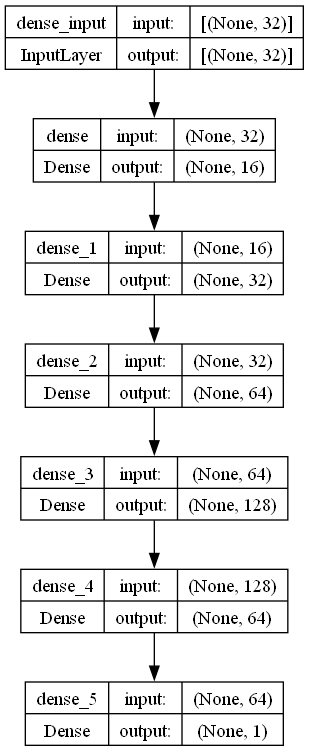

In [44]:
# Plot Layers
tf.keras.utils.plot_model(model_sequential_mnist, show_shapes=True)

### ii. - Model Training

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Using Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history_1 = model_sequential_mnist.fit(X_train_resampled, y_train_resampled,
                                       epochs=30,
                                       batch_size=32,
                                       validation_data=(X_val_preprocessed, y_val_encoded),
                                       callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
1106/1106 [==============================] - 4s 3ms/step - loss: 0.4552 - accuracy: 0.7821 - val_loss: 0.4501 - val_accuracy: 0.8022
Epoch 2/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.3922 - accuracy: 0.8212 - val_loss: 0.3814 - val_accuracy: 0.8281
Epoch 3/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8321 - val_loss: 0.4134 - val_accuracy: 0.8026
Epoch 4/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.3510 - accuracy: 0.8396 - val_loss: 0.3670 - val_accuracy: 0.8303
Epoch 5/30
1106/1106 [==============================] - 2s 2ms/step - loss: 0.3384 - accuracy: 0.8483 - val_loss: 0.3659 - val_accuracy: 0.8329
Epoch 6/30
1106/1106 [==============================] - 3s 2ms/step - loss: 0.3254 - accuracy: 0.8547 - val_loss: 0.3541 - val_accuracy: 0.8443
Epoch 7/30
1106/1106 [==============================] - 3s 3ms/step - loss: 0.3150 - accuracy: 0.8601 - val_loss: 0.3879 - val_accuracy:

### iii. - Model Evaluation

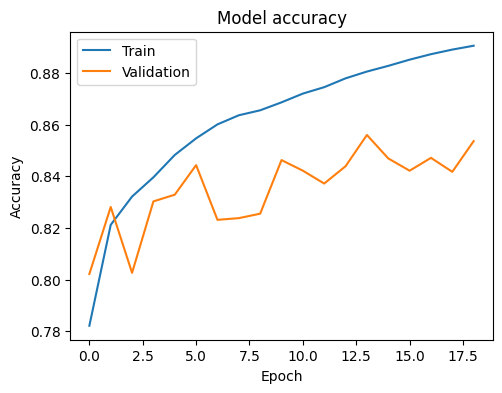

In [47]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

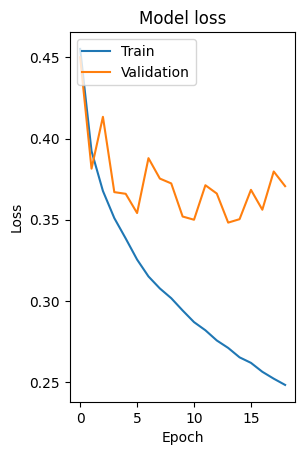

In [48]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# vii. ANN Training - Functional API

### i. - Model Definition

### ii. - Model Training

### iii. - Model Evaluation

# viii. Model Saving

# ix. Model Inference

# x. Pengambilan Kesimpulan